In [1]:
%run functions

c:\Users\GIGA\AppData\Local\Programs\Python\Python310\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
loader = DataLoader()
d = loader.GetData('ASAP')

In [3]:
NLP = spacy.load('en_core_web_sm')

In [4]:
token_c = []
for i in d.index:
    doc = NLP(d['essay'][i])
    c = 0
    for s in doc.sents:
        for t in s:
            c += 1
    token_c.append(c)
    if i%100 == 0:
        print(i)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900


In [5]:
d['token'] = token_c

In [26]:
for i in range(1,9):
    print('{:.2f}'.format(np.std(d[d['essay_set'] == i]['domain1_score'])))

1.54
0.77
0.81
0.94
0.97
0.97
4.58
5.75


In [13]:
(d[d['essay_set'] == 3]['token'])

count    1726.000000
mean      123.358633
std        61.718026
min        10.000000
25%        75.000000
50%       114.000000
75%       166.000000
max       417.000000
Name: token, dtype: float64

In [27]:
x = []
with open('features/asap-tasscs.csv','r') as f:
    line = f.readlines()
    print(len(line[0].split(',')))
for i in d.index:
    if d['essay_set'][i] == 1:
        x.append([float(s) for s in line[i+1].split(',')[1:]])
len(x)

150


1783

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(d.loc[d['essay_set'] == 1,'domain1_score'])
y = le.transform(d.loc[d['essay_set'] == 1,'domain1_score']) 
TrainY,TestY = y[:1400],y[1400:]

In [25]:
TrainX,TestX = np.array(x[:1400]),np.array(x[1400:])

In [26]:
model = xgb.XGBClassifier(tree_method="hist",objective='multi:softmax',num_class=6,learning_rate=0.03)
model.fit(TrainX,TrainY)
PredY = model.predict(TestX)
print(accuracy_score(TestY,PredY))
print(cohen_kappa_score(TestY,PredY,weights='quadratic'))

0.5221932114882507
0.79997348264973


Text(50.722222222222214, 0.5, 'True Label')

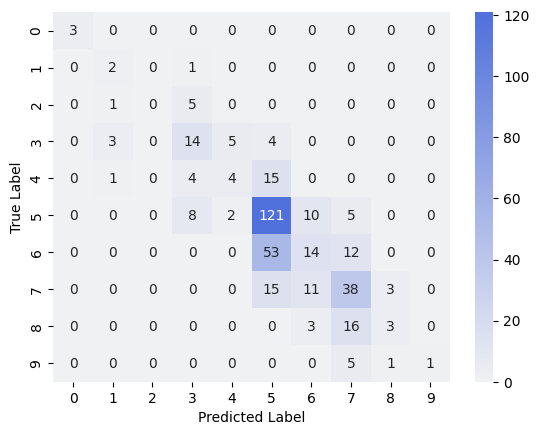

In [27]:
c = sns.light_palette((260, 75, 50),input = 'husl', as_cmap=True)
cm = confusion_matrix(TestY,PredY)
g = sns.heatmap(cm,annot=True,fmt='d',cmap=c)
g.set_xlabel('Predicted Label')
g.set_ylabel('True Label')